In [21]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Generate some sample data
np.random.seed(42)
data = {'x': np.random.randn(1000),
        'y': np.random.randn(1000)}
df = pd.DataFrame(data)

# Convert the DataFrame to a numpy array
X = df.to_numpy()

# Define the number of clusters
n_clusters = 3

# Run the FCM algorithm
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X.T, n_clusters, 2, error=0.005, maxiter=1000, init=None)

max_prob = np.max(u, axis=0)

# Predict the cluster for each sample
df['cluster'] = np.argmax(u, axis=0)
df['max_prob'] = max_prob

# Print the results
print(df.head(10))

          x         y  cluster  max_prob
0  0.496714  1.399355        0  0.838942
1 -0.138264  0.924634        0  0.562415
2  0.647689  0.059630        0  0.516895
3  1.523030 -0.646937        2  0.619125
4 -0.234153  0.698223        1  0.506670
5 -0.234137  0.393485        1  0.604096
6  1.579213  0.895193        0  0.722994
7  0.767435  0.635172        0  0.954110
8 -0.469474  1.049553        1  0.564541
9  0.542560 -0.535235        2  0.919517


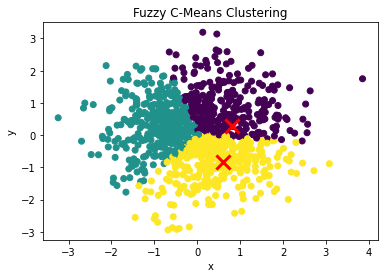

In [22]:
# Plot the data points colored by cluster
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis')

# Add the cluster centers to the plot
plt.scatter(cntr[0], cntr[1], marker='x', s=200, linewidths=3, color='r')

# Add a title and axis labels
plt.title('Fuzzy C-Means Clustering')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

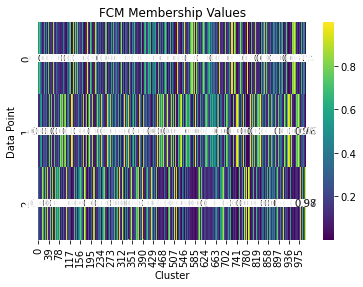

In [23]:
# Create a heatmap of the membership values for each data point and cluster
sns.heatmap(u, annot=True, cmap='viridis')

# Add a title and axis labels
plt.title('FCM Membership Values')
plt.xlabel('Cluster')
plt.ylabel('Data Point')

# Show the plot
plt.show()

In [24]:
# Create a heatmap of the membership values for each data point and cluster
fig = px.imshow(u, color_continuous_scale='viridis')

# Add a title and axis labels
fig.update_layout(title='FCM Membership Values',
                  xaxis_title='Cluster',
                  yaxis_title='Data Point')

# Show the plot
fig.show()

In [17]:
u

array([[0.83894191, 0.56241468, 0.51689455, ..., 0.01883111, 0.09229726,
        0.01195897],
       [0.09943662, 0.34392111, 0.12693273, ..., 0.01498608, 0.75514206,
        0.00933577],
       [0.06162148, 0.09366421, 0.35617272, ..., 0.96618281, 0.15256069,
        0.97870526]])

In [19]:
# Create a 2D scatter plot of the data with color coding for each cluster
fig = px.scatter(df, x='x', y='y', color='cluster')

# Add a title and axis labels
fig.update_layout(title='FCM Clustering Results',
                  xaxis_title='x',
                  yaxis_title='y')

# Show the plot
fig.show()

In [25]:
# Create a 2D scatter plot of the data with color coding for the maximum probability
fig = px.scatter(df, x='x', y='y', color='max_prob', color_continuous_scale='Viridis')

# Add a title and axis labels
fig.update_layout(title='FCM Clustering Results',
                  xaxis_title='x',
                  yaxis_title='y')

# Show the plot
fig.show()